<a href="https://colab.research.google.com/github/rajbeniwal710/Classification_Models/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [2]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [3]:
print(pharma_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [4]:
pharma_data = pharma_data.dropna()

In [5]:
#x-y 
x = pharma_data.iloc[:,:-1]
x = x.drop(['Patient_ID'], axis = 1)
y = pharma_data.iloc[:,-1]

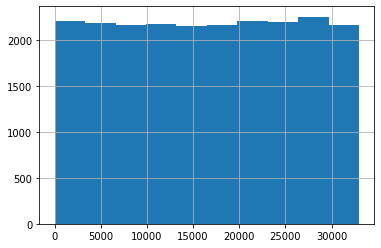

In [6]:
x['ID_Patient_Care_Situation'].hist()

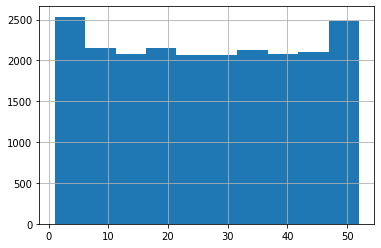

In [7]:
x['Diagnosed_Condition'].hist()

In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21849 entries, 0 to 23096
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  21849 non-null  int64  
 1   Diagnosed_Condition        21849 non-null  int64  
 2   Treated_with_drugs         21849 non-null  object 
 3   Patient_Age                21849 non-null  int64  
 4   Patient_Body_Mass_Index    21849 non-null  float64
 5   Patient_Smoker             21849 non-null  object 
 6   Patient_Rural_Urban        21849 non-null  object 
 7   Patient_mental_condition   21849 non-null  object 
 8   A                          21849 non-null  float64
 9   B                          21849 non-null  float64
 10  C                          21849 non-null  float64
 11  D                          21849 non-null  float64
 12  E                          21849 non-null  float64
 13  F                          21849 non-null  flo

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#data cleaning
x = pd.get_dummies(x)

In [11]:
x.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
1,18164,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,6283,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,5339,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
5,10808,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1


In [12]:
#lets drop some columns to drop dummy trap
x = x.drop(['Treated_with_drugs_DX6'], axis = 1)
x = x.drop(['Patient_Smoker_NO'], axis = 1)
x = x.drop(['Patient_Rural_Urban_URBAN'], axis = 1)

In [13]:
x = x.drop(['ID_Patient_Care_Situation'], axis = 1)

In [14]:
x.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_mental_condition_Stable
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,45,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [15]:
import numpy as np

In [16]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x['Diagnosed_Condition'] = mms.fit_transform(np.array(x['Diagnosed_Condition']).reshape(-1,1))
x['Patient_Age'] = mms.fit_transform(np.array(x['Patient_Age']).reshape(-1,1))
x['Patient_Body_Mass_Index'] = mms.fit_transform(np.array(x['Patient_Body_Mass_Index']).reshape(-1,1))

In [17]:
y = y.astype('category')

In [18]:
#train-validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [20]:
# Defining the decision tree algorithmd
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [21]:
# Predicting the values of test data
y_pred = dtree.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5480
           1       1.00      1.00      1.00      9158

    accuracy                           1.00     14638
   macro avg       1.00      1.00      1.00     14638
weighted avg       1.00      1.00      1.00     14638



In [22]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred))

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      2727
           1       0.79      0.76      0.78      4484

    accuracy                           0.73      7211
   macro avg       0.71      0.72      0.71      7211
weighted avg       0.73      0.73      0.73      7211



In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy Score: 0.7265289141589238')

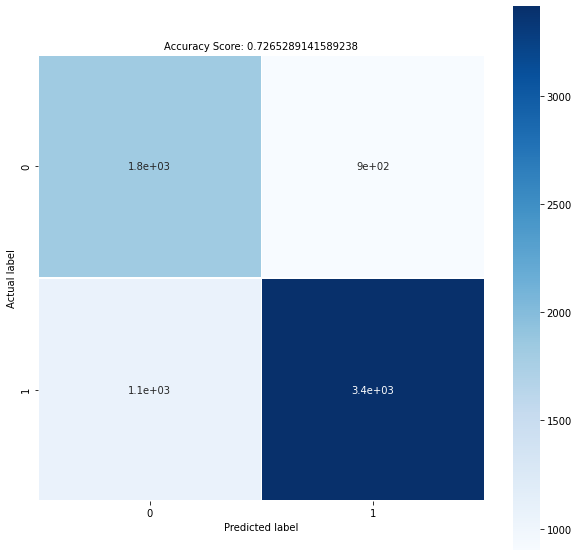

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 10)

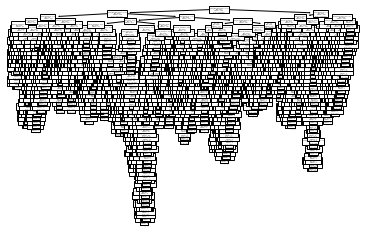

In [25]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = x.columns)

In [27]:
x.shape

(21849, 45)

In [ ]:
#accuracy is quite low...
#lets try to optimise it

In [30]:
#Hyperparameter tuning for model optimization

In [31]:
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
pca = decomposition.PCA()
# Creating a DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

In [35]:
#tranforming the data with PCA.
#training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('pca', pca),('dec_tree', dec_tree)])

# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X_train.shape[1]+1,1))

# Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [36]:
# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

# Fitting the grid search
clf_GS.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('dec_tree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=N

In [40]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print()
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 10
Best Number Of Components: 40

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [41]:
y_pred = clf_GS.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      5480
           1       0.87      0.91      0.89      9158

    accuracy                           0.86     14638
   macro avg       0.85      0.84      0.85     14638
weighted avg       0.86      0.86      0.86     14638



In [44]:
# Predicting the values of test data
y_pred = clf_GS.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred))

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.69      0.61      0.65      2727
           1       0.78      0.83      0.80      4484

    accuracy                           0.75      7211
   macro avg       0.73      0.72      0.73      7211
weighted avg       0.74      0.75      0.74      7211



Text(0.5, 1.0, 'Accuracy Score: 0.7473304673415615')

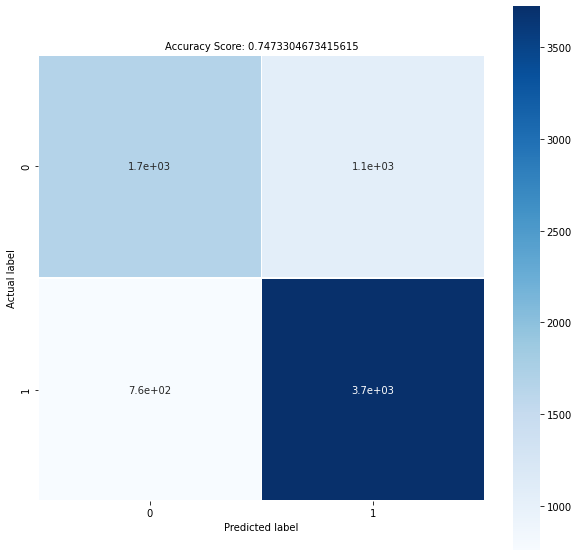

In [46]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf_GS.score(X_test, y_test))
plt.title(all_sample_title, size = 10)